In [1]:
import numpy as np
import pandas as pd
import io
import os
import csv
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image
import pydotplus

In [2]:
from sklearn.tree import DecisionTreeClassifier
import nbformat
from nbconvert import PythonExporter


In [3]:
from sklearn.model_selection import train_test_split
import json


In [4]:
from sklearn import metrics
from flask import Flask, jsonify

import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

cred = credentials.Certificate("we-don-t-byte---ass-firebase-adminsdk-kdbj6-ec500ebd6d.json")
firebase_admin.initialize_app(cred)
db = firestore.client()


In [5]:
#loading Dataset

col_names = ['Prod_ID', 'Prod_Cat', 'User_ID', 'User_Province', 'Event', 'Clicks', 'Wishlist', 'Recommend']


pima = pd.read_csv("../assets/DecisionTreeData/Train_Data.csv", header=None, names=col_names)

pima

feature_cols = ['Prod_Cat', 'User_Province', 'Clicks', 'Wishlist']

X = pima[feature_cols]
y = pima.Recommend

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

trained_IDs = pima.Prod_ID

#def recommendTofile():

provinceJson =  '{ "Limpopo" : 1,"Gauteng" : 2,"Free State" : 3,"Western Cape" : 4,"Kwazulu-Natal" : 5,"North West" : 6,"Northern Cape" : 7,"Eastern Cape" : 8,"Mpumalanga" : 9}'


# parse x:

print('collection')
products_ref = db.collection('Products')
Products_docs = products_ref.get()

print('collected')

users_ref = db.collection('Users')
users_docs = users_ref.list_documents()





collection
collected


In [6]:
list = []
for doc in users_docs:
    #print(doc.id)
    provinceJson =  '{ "Limpopo" : 1,"Gauteng" : 2,"Free State" : 3,"Western Cape" : 4,"KZN" : 5,"KwaZulu-Natal": 5,"North West" : 6,"Northern Cape" : 7,"Eastern Cape" : 8,"Mpumalanga" : 9}'
    loadProvinceJ = json.loads(provinceJson)
   
    categoryJson =  '{"Books" : 1, "Shoes" : 2, "Clothing" : 3, "Tech" : 4, "Kitchen" : 5}'
    loadCategoryJ = json.loads(categoryJson)
    province = ''
    
    userDoc1 = users_ref.document(doc.id)
    userColl1 = userDoc1.collection('info')
    userColl2 = userDoc1.collection('Wishlist')
    colDocs1 = userColl1.get()
    s = False
    colDocs2 = userColl2.list_documents()
    info = userColl1.get()
        #
    #    Province
    #
    for colD_doc in colDocs1:
        province = colD_doc.get('province')
        province = loadProvinceJ[province]

    #print("Province:" + province)
    #
    # ##
    # Wishlist
    ####
    if province == '':
        continue
    else:        
        for prod_doc in Products_docs:
            pid = prod_doc.id

            if pid in trained_IDs:
                continue
            else:
                s = pid in colDocs2
                if s :
                    wishlist = 1
                else:
                     wishlist = 0    
          #  print("product_ID: " + pid)
           # print("In Wishlist ? : " + str(wishlist))

            noOfClicks = 1
        #
        #   Clicks
        #
            if prod_doc.get('clicks')>= 1:
                noOfClicks = prod_doc.get('clicks')
            
        #
        #
        #  Product
        #
            category = prod_doc.get('category')
       # print("Category: " + str(loadCategoryJ[category]))
       # print("Clicks: " + str(noOfClicks))
            category = loadCategoryJ[category]
        
            listTemp = [pid, category, doc.id, province, 'view', noOfClicks, wishlist]
            
           

            #print(listTemp)

            test_data = pd.DataFrame([listTemp], columns=['Prod_ID', 'Prod_Cat', 'User_ID', 'User_Province', 'Event', 'Clicks', 'Wishlist'])

        #test = pd.read_csv("../assets/DecisionTreeData/Train_Data.csv", header=None, names=col_names)
 
            y_predict = clf.predict(test_data[feature_cols])

            if(y_predict == 1):
                str = doc.id + "|" + pid
                #print(str)
                list.append(str)
                print(str)
        

1RvEwuC2eCdzoKyaATXC9pNsXwH3|01jWTF8NnJRanatcqWWA
1RvEwuC2eCdzoKyaATXC9pNsXwH3|03qJv4WzHoKBslyT6bcw
1RvEwuC2eCdzoKyaATXC9pNsXwH3|0FrZIkNP98yWbVRuE1Wd
1RvEwuC2eCdzoKyaATXC9pNsXwH3|0cCtsXbwGQqu7LoLIFmv
1RvEwuC2eCdzoKyaATXC9pNsXwH3|0cHxbCxG7mY7xA7l1Dpn
1RvEwuC2eCdzoKyaATXC9pNsXwH3|0s4fAbVOqdJv7eYcZ5Zr
1RvEwuC2eCdzoKyaATXC9pNsXwH3|0tOD2R8VprURTzYF4b9m
1RvEwuC2eCdzoKyaATXC9pNsXwH3|0zwT3y7XarK0kA2m6459
1RvEwuC2eCdzoKyaATXC9pNsXwH3|1GOto1UFk2QuXBdSSyUj
1RvEwuC2eCdzoKyaATXC9pNsXwH3|1Q30dEBi2W6i358rT2g4
1RvEwuC2eCdzoKyaATXC9pNsXwH3|1WCHDQT6LwpTDo6sX1wv
1RvEwuC2eCdzoKyaATXC9pNsXwH3|1YZ02BpCyAzkuMs0uTTU
1RvEwuC2eCdzoKyaATXC9pNsXwH3|1iSLejnhJVgmRe0iwHkw
1RvEwuC2eCdzoKyaATXC9pNsXwH3|1lZkdgEeh9MLTJfUYnby
1RvEwuC2eCdzoKyaATXC9pNsXwH3|2ZIjNxeaNXgZS3KHhMUP
1RvEwuC2eCdzoKyaATXC9pNsXwH3|2ffKEUPN9bWtWmYMfo8C
1RvEwuC2eCdzoKyaATXC9pNsXwH3|2sGL2xUGipXFhuTiv6yW
1RvEwuC2eCdzoKyaATXC9pNsXwH3|2sZA2SnVdR8wgU5Es6CK
1RvEwuC2eCdzoKyaATXC9pNsXwH3|2suTIt6CxtXy6j7dnAaH
1RvEwuC2eCdzoKyaATXC9pNsXwH3|32JR4GcAFMlyqvzR3LoP


In [7]:
np.savetxt("../assets/DecisionTreeOutputs/final_recommendations.csv", list, delimiter=",", fmt='%s')

-----------------------------------------------ACCURACY BEFORE PRUNING---------------------------------

0.9380530973451328

-------------------------------------------------------------------------------------------------------

|--- User_Province <= 1.50
|   |--- Wishlist <= 0.50
|   |   |--- Prod_Cat <= 4.50
|   |   |   |--- Prod_Cat <= 3.50
|   |   |   |   |--- Prod_Cat <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Prod_Cat >  1.50
|   |   |   |   |   |--- Clicks <= 2.50
|   |   |   |   |   |   |--- Clicks <= 1.50
|   |   |   |   |   |   |   |--- Prod_Cat <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Prod_Cat >  2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Clicks >  1.50
|   |   |   |   |   |   |   |--- Prod_Cat <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Prod_Cat >  2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Clicks

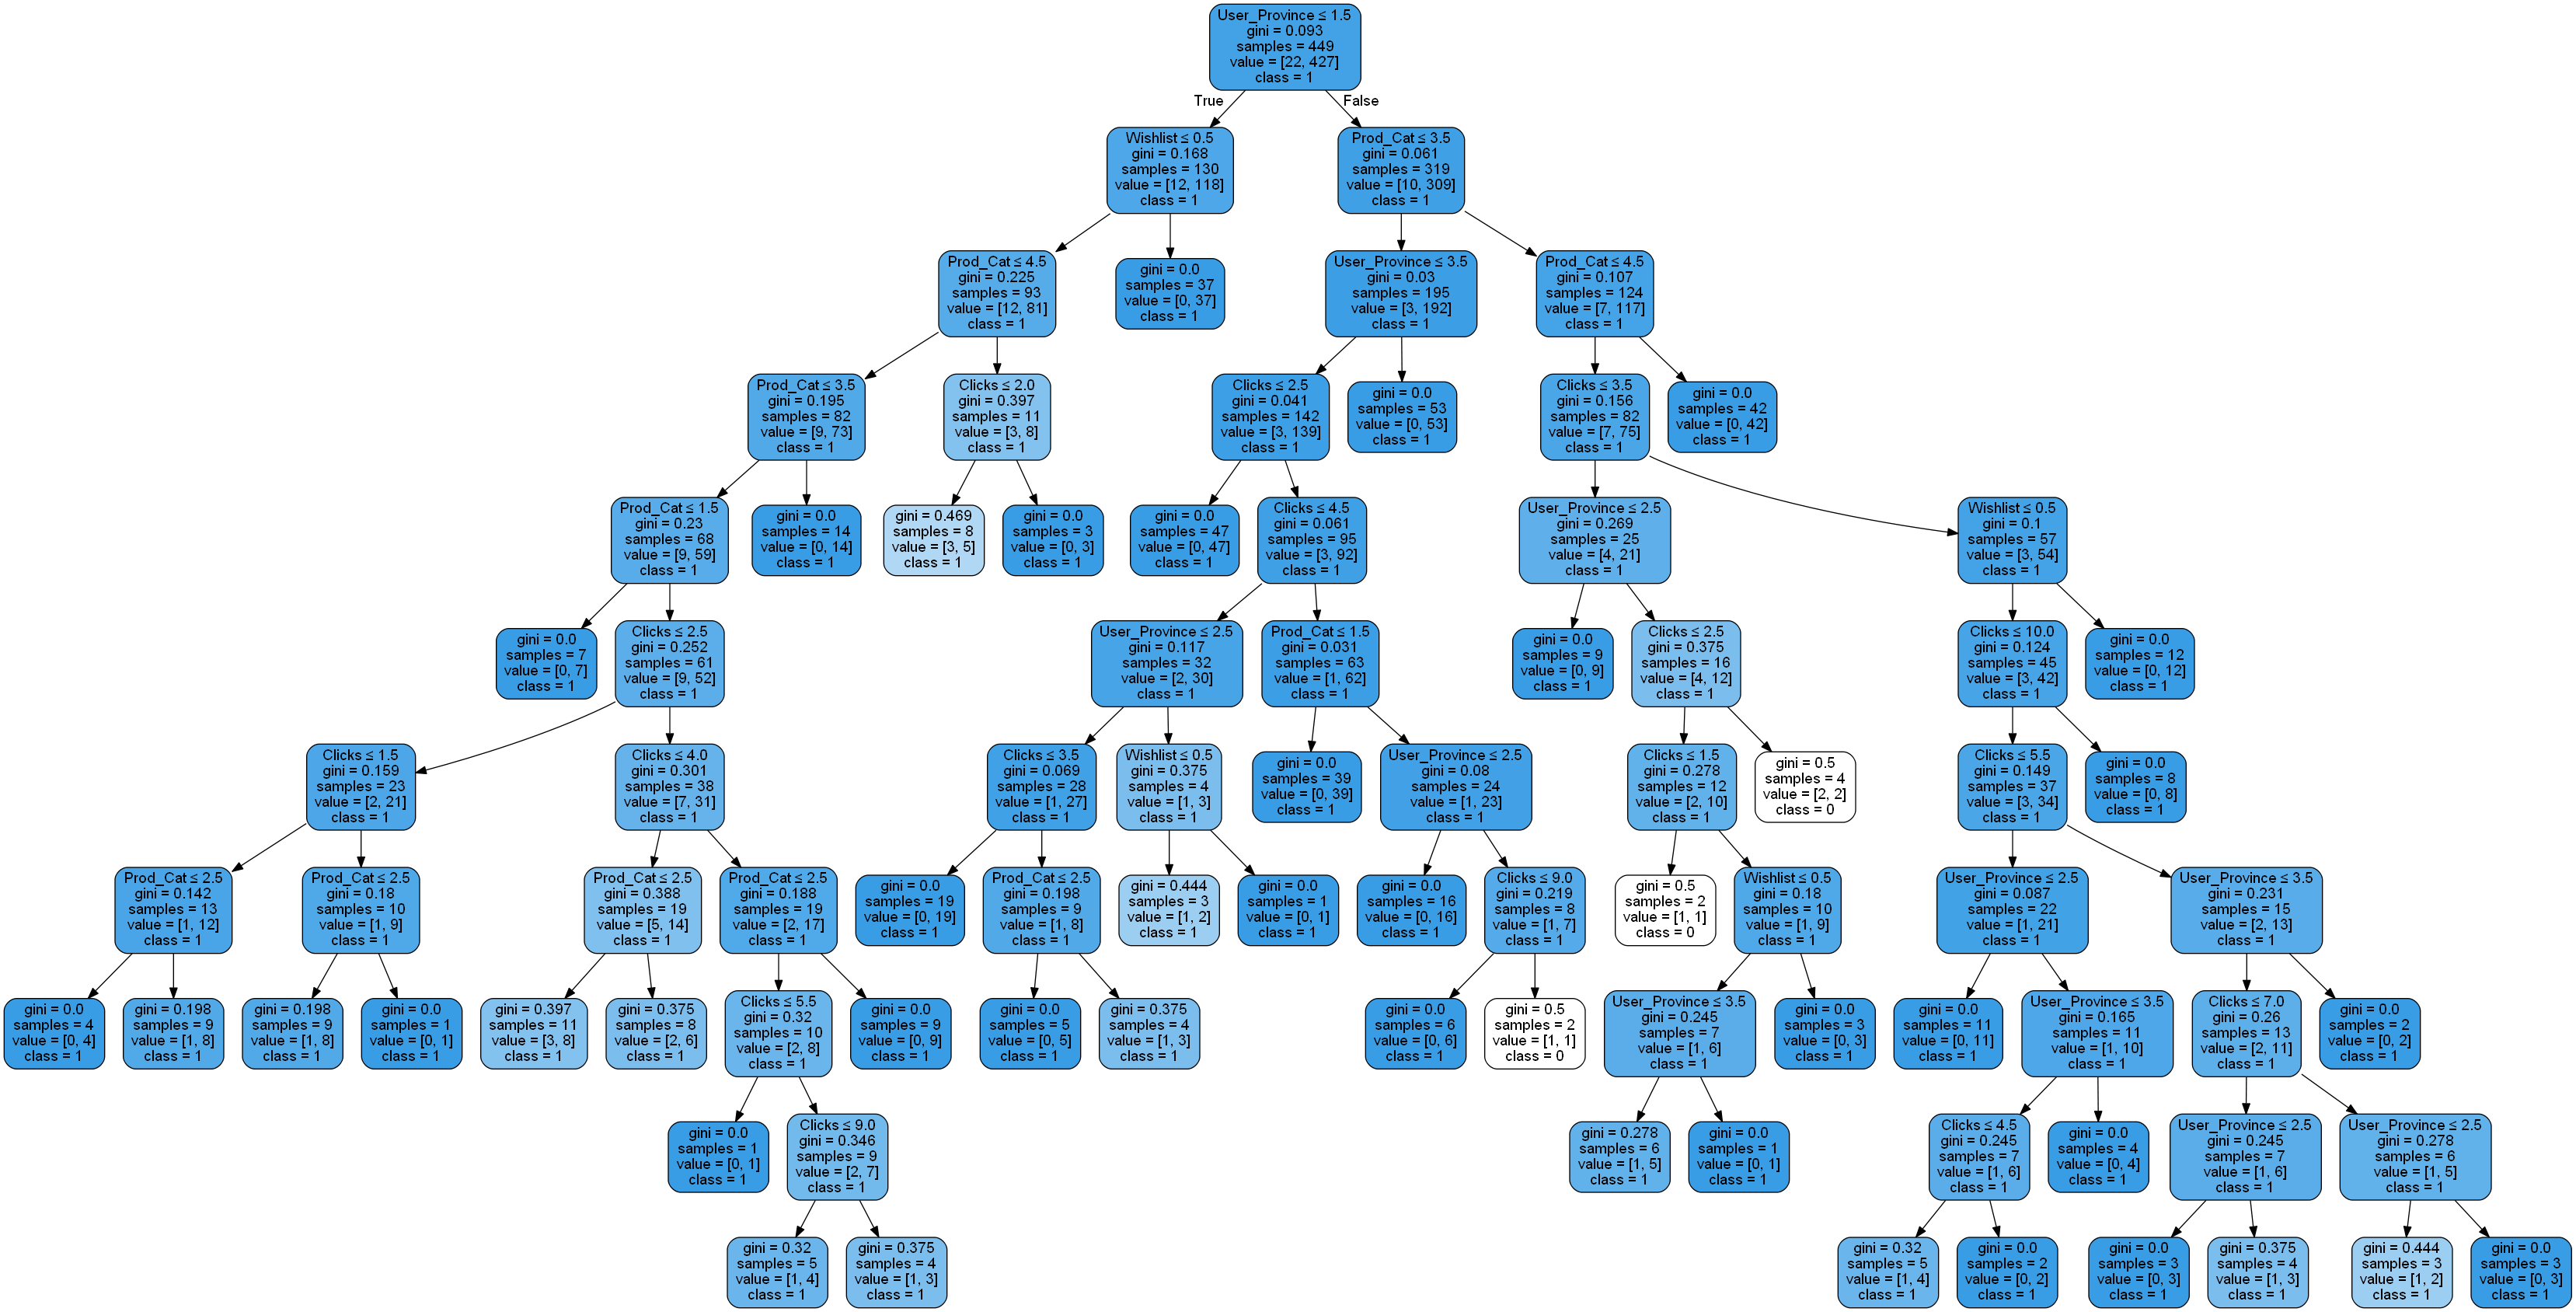

In [8]:
#Before Pruning

y_predict = clf.predict(X_test)


AccuracyBeforePruning = metrics.accuracy_score(y_test, y_predict)
print("-----------------------------------------------ACCURACY BEFORE PRUNING---------------------------------\n")
print(AccuracyBeforePruning)

print("\n-------------------------------------------------------------------------------------------------------\n")

r = export_text(clf, feature_names=feature_cols)

print(r)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../assets/DecisionTreeOutputs/recommendations.png')
Image(graph.create_png())

-----------------------------------------------ACCURACY AFTER PRUNING-------------------------------

0.9469026548672567

-------------------------------------------------------------------------------------------------------

|--- Wishlist <= 0.50
|   |--- User_Province <= 1.50
|   |   |--- Prod_Cat <= 1.50
|   |   |   |--- class: 1
|   |   |--- Prod_Cat >  1.50
|   |   |   |--- Prod_Cat <= 4.50
|   |   |   |   |--- Prod_Cat <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Prod_Cat >  3.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Prod_Cat >  4.50
|   |   |   |   |--- Clicks <= 2.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Clicks >  2.00
|   |   |   |   |   |--- class: 1
|   |--- User_Province >  1.50
|   |   |--- User_Province <= 3.50
|   |   |   |--- User_Province <= 2.50
|   |   |   |   |--- Clicks <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Clicks >  3.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- User_Province >  2.5

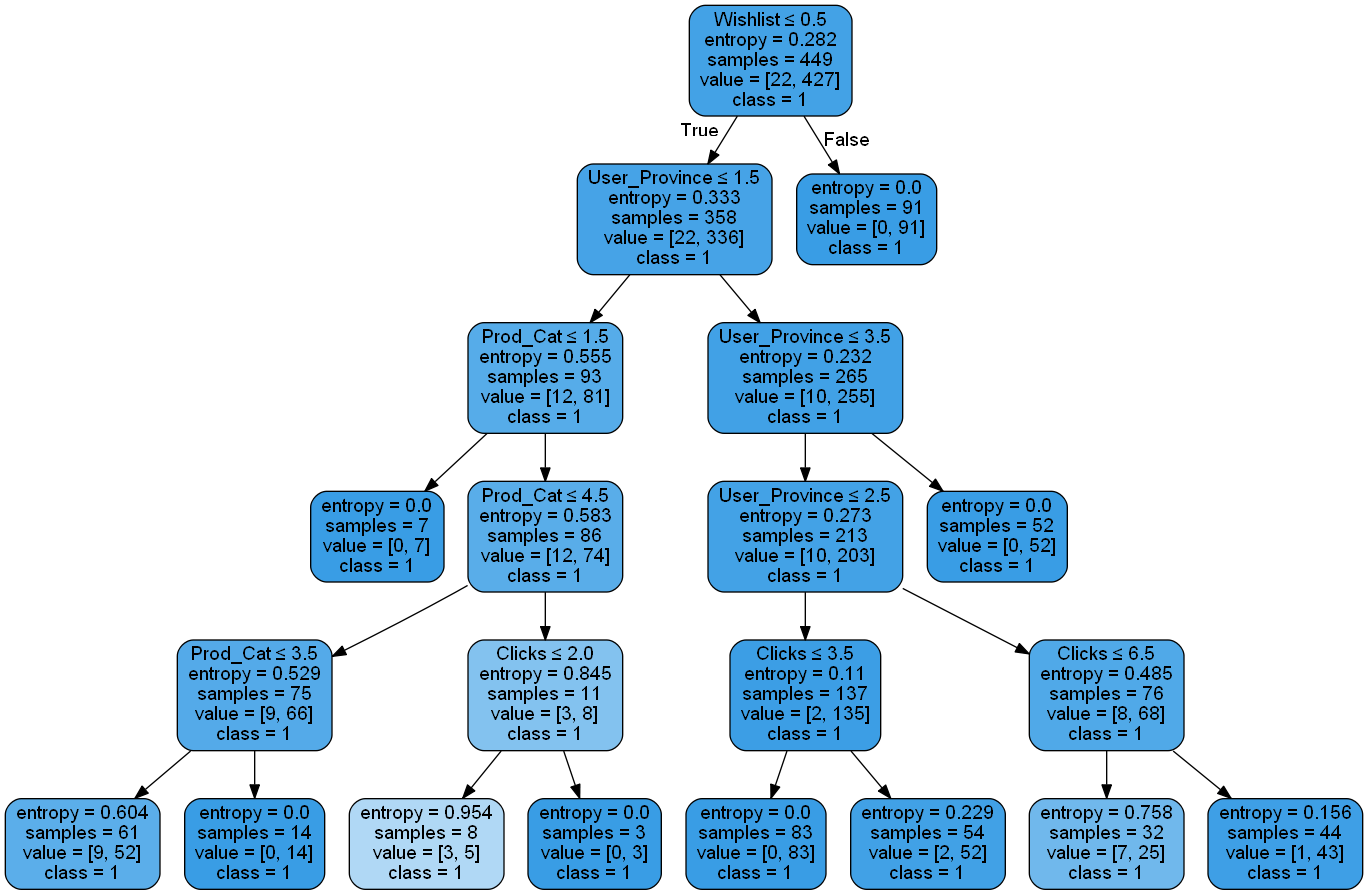

In [9]:
#After pruning 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5) #Given a depth of 5 to make the tree less complicated(Avoid overfitting)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

AccuracyAfterPruning = metrics.accuracy_score(y_test, y_pred)

print("-----------------------------------------------ACCURACY AFTER PRUNING-------------------------------\n")
print(AccuracyAfterPruning)
print("\n-------------------------------------------------------------------------------------------------------\n")

r = export_text(clf, feature_names=feature_cols)

print(r)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('../assets/DecisionTreeOutputs/recommendations(Pruned).png')
Image(graph.create_png())
